## Understanding k-means

Introducing the problem formulation **unsupervised learning** context...

Then simulate some data to draw a 2-dimensional graphical example easy to visualize with two well differentiated clusters (visually is obvious the parameter k of the algorithm)

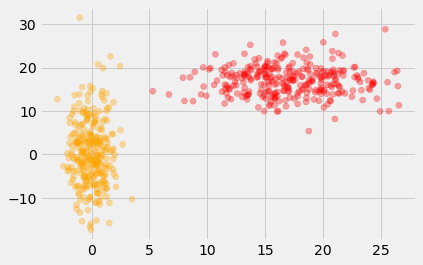

In [102]:
import numpy as np
from scipy import ndimage
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

# create the 2 parameters (mu, cov) for 2 multinomial distribution
mu_a = [0, 0]
cov_a = [[1, 0], [0, 50]]
mu_b = [17, 17]
cov_b = [[15, 0], [0, 12]]

# simulate 75 observation for each distribution (group)
x1_a, x2_a = np.random.multivariate_normal(mu_a, cov_a, 300).T
x1_b, x2_b = np.random.multivariate_normal(mu_b, cov_b, 300).T

# merge
df_a = np.array([x1_a, x2_a, np.zeros(300)], dtype = 'float64').T
df_b = np.array([x1_b, x2_b, np.ones(300)], dtype = 'float64').T
original = np.vstack((df_a, df_b))

# create a numpy array without labels
df = original[:, :2]

# a data frame with the labels (prior knowledge by simulation)
data = pd.DataFrame(original)

# plot by distribution
colors = {0:'orange', 1:'red'}
plt.scatter(data[0], data[1], c=data[2].apply(lambda x: colors[x]), alpha = 0.35)

Write something about we want to identify given an algorithm some underlying groups of the data.

The objective function of k-means algorithm:
$$J^{clust} = (||x_1 - z_{c_1}||^2 + ... + ||x_N - z_{c_N}||^2)\hspace{1mm}/\hspace{1mm} N$$

### k-means algorithm

**given** a list of $N$ vectors $x_1, ..., x_N$, and an initial list of $k$ group representative vectors $z_1, ..., z_k$
1. Partition the vectors into k groups. For each vector $i = 1, ..., N$, assign $x_i$ to the group associated with the nearest representative
2. Update representatives. For each group $j = 1, ..., k$, set $z_j$ to be the mean of the vectors in group $j$

*From chapter 4 of Introduction to Applied Linear Algebra. Vectors, Matrices, and Least Squares.- S. Boyd and L. Vandenberghe*

The representatives of cluster $z_i$ are real numbers that represent each cluster $k_i$. The task of $J^{clust}$ is minimize the distance between each point $x_i$ and the representative of the assigned cluster to that point $z_i$. We use a greedy approach to mimimize the objective function because is based in two task at the same time:

1. Choose the best clustering
2. Choose the best representatives

The greedy approach mentioned is base on the idea of fix the representatives and find the best clustering given the fixed value and viceversa.

When the group of representatives are fixed, the problem of assign the best cluster is:

$$||x_i - z_{c_i}|| = \min\limits_{j = 1, \dots,k} ||x_i - z_j||$$

Choosing the group of representatives given an assignment of cluster is:
$$z_j = (1 \hspace{1mm} / \hspace{1mm} |G_j|)\sum\limits_{i \in G_j}x_i$$

where $|G_j|$ is the size of the group $j$

In order to implement k-means we start creating a function to compute the euclidean distance:

In [56]:
def euclidean_distance(x, y):
    '''
    x: a float numpy 1-d array
    y: a float numpy 1-d array
    ---
    Return the euclidean distance between x and y
    '''
    return np.sum((x - y) ** 2)

Here is a simple usage:

In [57]:
euclidean_distance(np.array([2, 3, 1]), np.array([1, 2, 0]))

3

Now we draw the pseudo code to implement the k means algorithm.

    def k_means(x, k):
    '''
    x: a 2-dimensional numpy array
    k: number of cluster
    ---
    Return the vector c with the cluster assignments of each element of x
    '''
        # initialize the group representatives taken k random vectors from x (z) and 
        # the vector of cluster assignment (c)
        z = x[np.random.randint(0, x.shape[0], k), :]
        c = np.zeros(x.shape[0])
        while status:
            # repeat the process until convergence
            index = 0
            for x_i in x:
                # for each vector assign the cluster that minimize the distance with
                # the corresponding representative        
            # then update each representative for the mean of the group of vectors
            # belong that the cluster
            
            # check the convergence status
        return c             

Basically the way to think about the implementation is:
1. 2-d array that contain the data (* a 2-d numpy array or pandas DataFrame*)
2. Iterate along each row index (*vector observation $x_i$*) of the 2-d array

    - Compute the euclidean distance between the vector observation $x_i$ and a set of cluster representation vectors $z_i$
    - Pick the cluster $k$ with correspond to the one that his cluster representation vector $z_k$ minimize the distance computed above
3. Partition the data by clusters and update the set of cluster representation vectors $z_i$ as the mean of each $x_i \in (1, \dots , k)$
4. Repeat the step 2 and 3 until converge. For converge we understand when the cluster representation vectors $z_i(t)$ don't change with the corresponding $z_i(t-1)$ in the previous iteration


### Step 2: Assign clusters

So we start to solve the second step just for one iteration to understand the idea of what happen in this step.

In [112]:
# approach using numpy array as data structures for cluster representatives (z)
#z = df[np.random.randint(0, df.shape[0], 2), :]
#c = np.zeros(df.shape[0])
#index = 0
#for x_i in df:
#    distance = []
#    for z_i in z:
#        distance.append(euclidean_distance(x_i, z_i))
#    # assign the vector obseravtion to a cluster
#    print('Vector observation:', index, '| Computed distances:', distance, '| Cluster assigned:', np.argmin(distance))
#    c[index] = np.argmin(distance)
#    index += 1

In [113]:
# approach using data frames as data structure for cluster representatives (z)
z = pd.DataFrame(df[np.random.randint(0, df.shape[0], 2), :])
c = np.empty(df.shape[0], dtype = 'int32')
index = 0
for x_i in df:
    distance = []
    for i in range(z.shape[0]):
        distance.append(euclidean_distance(x_i, np.array(z.iloc[[i], :])))
    c[index] = np.argmin(distance)
    if index <= 10:
        print('Vector observation:', index, '| Computed distances:', distance, '| Cluster assigned', c[index])
    index += 1
    


Vector observation: 0 | Computed distances: [682.97581306552729, 203.4354796300789] | Cluster assigned 1
Vector observation: 1 | Computed distances: [528.02529813238107, 388.39463344765352] | Cluster assigned 1
Vector observation: 2 | Computed distances: [394.98327537372109, 591.52219785819511] | Cluster assigned 0
Vector observation: 3 | Computed distances: [476.34574139367794, 495.53653595643254] | Cluster assigned 0
Vector observation: 4 | Computed distances: [626.00271234722686, 262.4329441043833] | Cluster assigned 1
Vector observation: 5 | Computed distances: [426.19162484045802, 519.62408981817941] | Cluster assigned 0
Vector observation: 6 | Computed distances: [785.65311352251672, 167.16982947240015] | Cluster assigned 1
Vector observation: 7 | Computed distances: [496.89818689716139, 475.95319616160754] | Cluster assigned 1
Vector observation: 8 | Computed distances: [1122.4741344763636, 41.458411018211429] | Cluster assigned 1
Vector observation: 9 | Computed distances: [107

You can look some internal computation of the iterative process above!

### Step 3: Update cluster representative vectors 

Now we have the vector $c$ filled with the assignation of a cluster by each observation. The following step is update $z$ with the mean of each cluster group. So now, we need to partition the data by cluster. We can use the following approach ([see this stackoverflow answer](https://stackoverflow.com/questions/28597383/getting-median-of-particular-rows-of-array-based-on-index)):

In [105]:
data =pd.DataFrame(df)
data['label'] = pd.Series(c)
data.groupby('label').mean()

,0,1
label,,
0,2.144174,3.093809
1,18.370776,17.325670


### Step 4: Check convergence

When this circular process of assign cluster given a fix cluster representatives $z$ and then update given the cluster assigned ends? After some iteration $t$ the cluster representatives $z$ doesn't change with respect iteration $t-1$, when this happen we could declare convergence.

    check_cluster_representative = data.groupby('cluster').mean()
        if np.all(np.equal(check_cluster_representative, z)):
        break     # break the loop

Putting all the pieces together we have:

In [74]:
def k_means(x, k):
    '''
    x: a 2-dimensional numpy array
    k: number of cluster
    ---
    Return a list with the cost function J per iteration and the vector c with the final
    cluster assignments of each element of x
    '''
    # initialize the group representatives taken k random vectors from x
    z = pd.DataFrame(x[np.random.randint(0, x.shape[0], k), :])
    data = pd.DataFrame(x)
    c = np.empty(df.shape[0], dtype = 'int32')
    J = []
    while True:
        # repeat the process until convergence
        index = 0
        J_i = 0
        # for each vector assign the cluster that minimize the distance
        # with the corresponding representative
        for x_i in x:
            distance = []
            for i in range(z.shape[0]):
                distance.append(euclidean_distance(x_i, np.array(z.iloc[[i], :])))
            c[index] = np.argmin(distance)
            J_i += np.min(distance) ** 2
            index += 1
        J.append(J_i)
        data['cluster'] = c
        # check convergence status
        check_cluster_representative = data.groupby('cluster').mean()
        if np.all(np.equal(check_cluster_representative, z)):
            break
        # Else update each representative for the mean of the group of
        # vectors belong that cluster
        z = check_cluster_representative
    return J, c

Additionally to return the vector of cluster assignments $c$ we have another output, a list with the computed cost function $J_t$ for each iteration $t$ of the k-means algorithm.

In [107]:
J, c = k_means(df, 2)

Look the cluster assignated to each observation of data... can we identify the same group that we know *a priori* with the simulated data?

In [108]:
c

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0,

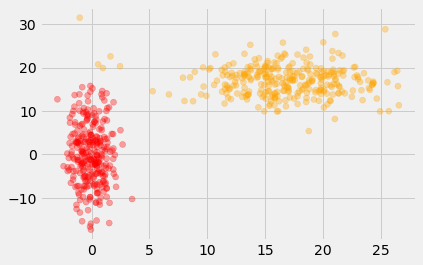

In [109]:
clustered_data = pd.DataFrame(df)
clustered_data['cluster_assigned'] = c
colors = {0:'orange', 1:'red'}
plt.scatter(clustered_data[0], clustered_data[1], c = clustered_data['cluster_assigned'].apply(lambda x: colors[x]), alpha = 0.35)

In [110]:
clustered_data.groupby('cluster_assigned').count()

,0,1
cluster_assigned,,
0,305,305
1,295,295


Also we can look how the cost function $J$ decrease over each iteration until $z$ reach convergence.

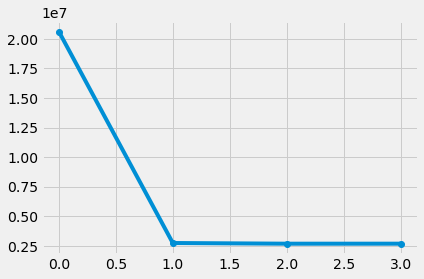

In [111]:
plt.plot(J, '-o')